In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

print("Setup works! 🎉")

Setup works! 🎉


In [36]:
df=pd.read_csv("movies.csv")

before = len(df)
df=df.dropna(subset=['budget','gross'])
df.to_csv("cleaned_data.csv", index=False)
after=len(df)





In [ ]:

print("number of deleted rows",before-after)

number of deleted rows 2232


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   float64
 12  gross     5436 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 679.5+ KB


In [37]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5436.000000,5436.000000,5.436000e+03,5.436000e+03,5.436000e+03,5435.000000
mean,2001.651582,6.392642,1.149110e+05,3.593864e+07,1.030045e+08,108.156394
std,10.541791,0.963200,1.842255e+05,4.154770e+07,1.871051e+08,18.121401
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.671199e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'gross'}>]], dtype=object)

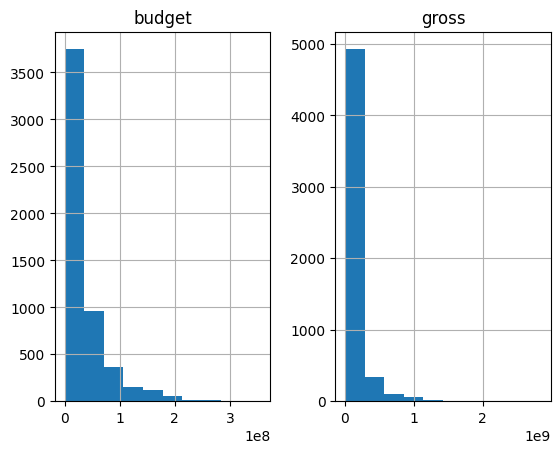

In [39]:
df[['budget','gross']].hist()

In [40]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


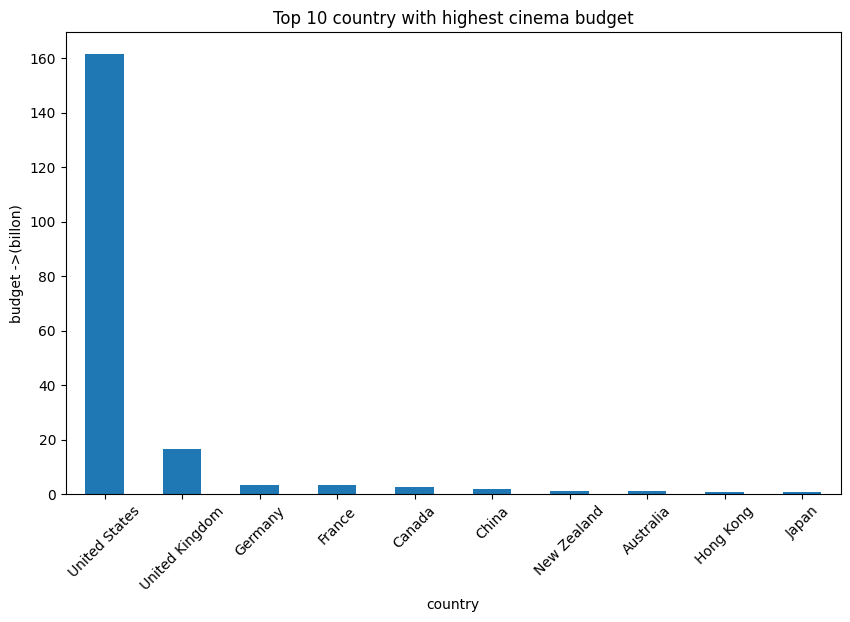

In [ ]:
#task1 Top 10 country with highest cinema budget
country_budget=df.groupby('country')['budget'].sum().sort_values(ascending=False)
country_budget=(country_budget.head(10)/1e9)
country_budget.plot(kind='bar',figsize=(10,6))
plt.title("Top 10 country with highest cinema budget")
plt.ylabel("budget ->(billon)")
plt.xlabel("country")
plt.xticks(rotation=45)
plt.show()

genre
Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Fantasy        42
Mystery        17
Name: count, dtype: int64


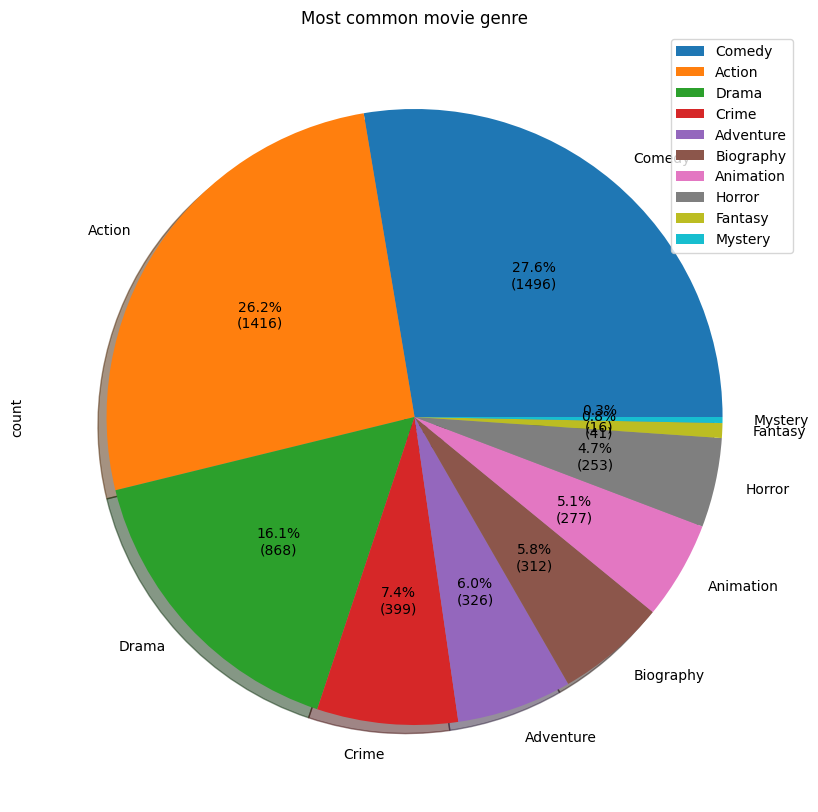

In [98]:
#task2 Most common movie genres
commonGenres=df['genre'].value_counts().sort_values(ascending=False)
commonGenres=commonGenres.head(10)
commonGenres.plot(kind="pie",figsize=(10,10),shadow = True, autopct=lambda p: f'{p:.1f}%\n({int(commonGenres.sum()*p/100)})')
print(commonGenres)
plt.title("Most common movie genre")
plt.legend(labels=commonGenres.index, loc="best")
plt.legend()


Text(0.5, 1.0, 'Score vs Budget')

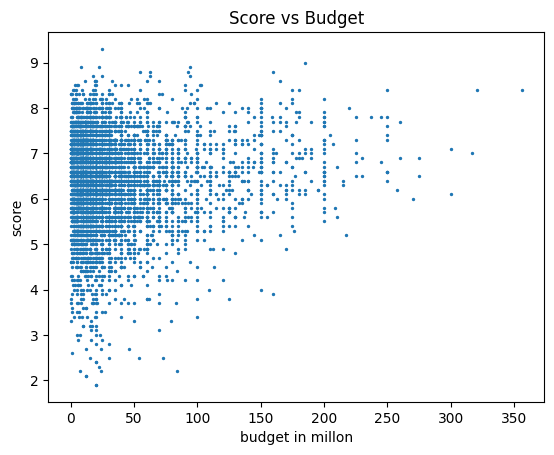

In [115]:
#task 3 Score vs. Budget
score=df['score']
budget=df['budget']
budget=budget.map(lambda x:x/1e6)
plt.scatter(budget,score,s=2)
plt.xlabel("budget in millon")
plt.ylabel("score")
plt.title("Score vs Budget")

Text(0.5, 1.0, 'votes vs Budget')

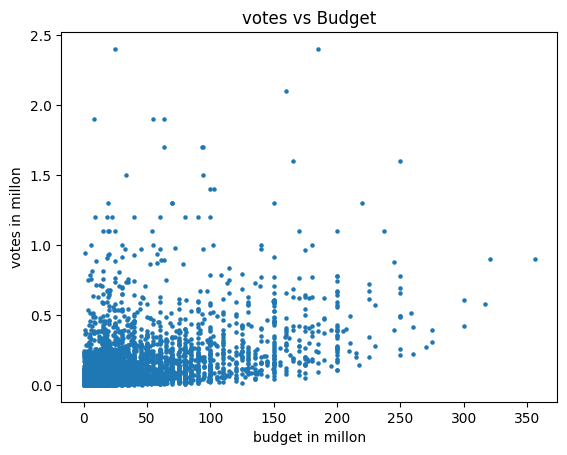

In [123]:
#task 4 votes vs. Budget
votes=df['votes']
budget=df['budget']
budget=budget.map(lambda x:x/1e6)
votes=votes.map(lambda x:x/1e6)
plt.scatter(budget,votes,s=5)
plt.xlabel("budget in millon")
plt.ylabel("votes in millon")
plt.title("votes vs Budget")

Text(0, 0.5, 'Votes in millions')

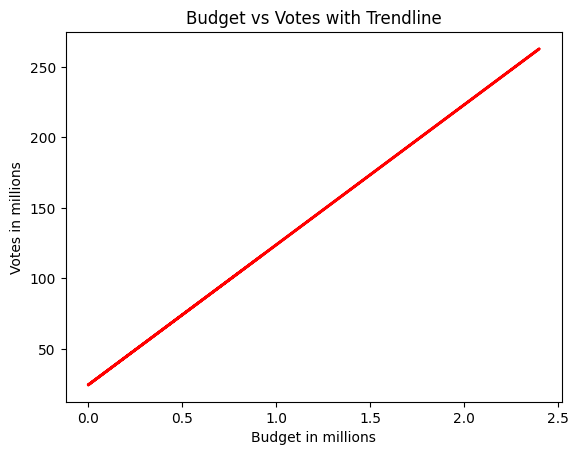

In [131]:
#trendline
m,b=np.polyfit(votes,budget,1) #fit in 1 degree ploynomial
plt.plot(votes,m*votes+b,color="red",linewidth=2)
plt.title("Budget vs Votes with Trendline")
plt.xlabel("Budget in millions")
plt.ylabel("Votes in millions")


[Text(0, 0, 'year'),
 Text(0, 1, 'score'),
 Text(0, 2, 'votes'),
 Text(0, 3, 'budget'),
 Text(0, 4, 'gross'),
 Text(0, 5, 'runtime')]

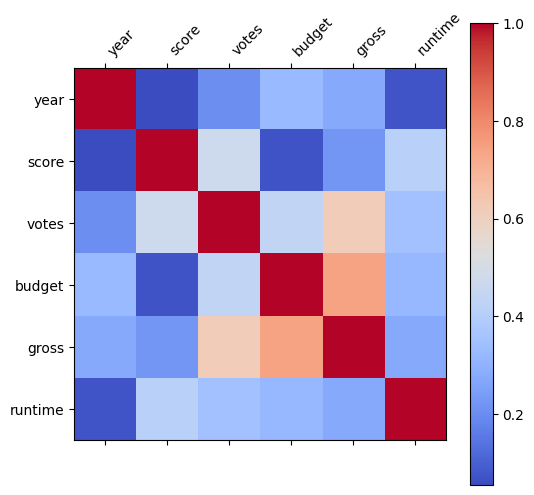

In [177]:
#task4 correlation heatmap

corrMap=df.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(6,6))
cax=ax.matshow(corrMap,cmap='coolwarm')
plt.colorbar(cax)
ax.set_xticks(range(len(corrMap.columns)))
ax.set_yticks(range(len(corrMap.columns)))
ax.set_xticklabels(corrMap.columns, rotation=45,ha="left")
ax.set_yticklabels(corrMap.columns)